<a href="https://colab.research.google.com/github/xainse/ml-internship/blob/main/Onix_Internship%2C_ML_Lesson_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Read a csv-file into DataFrame
from pandas import read_csv

# Split arrays or matrices into train and test subsets
from sklearn.model_selection import train_test_split

# Mean absolute error regression loss
from sklearn.metrics import mean_absolute_error

# Apply a power transform featureswise to make data more Gausian-like.
from sklearn.preprocessing import PowerTransformer 

# A Sequential model is appropriate for a plain stack of layers where each 
# layer has exactly one input tensor and one output tensor. 
from keras import Sequential

# Dense - regular densely-connected NN layer.
# Applies Dropout to the input. 
from keras.layers import Dense, Dropout 

# matplotlib.pyplot is a collection of functions that
# make matplotlib works lite MATLAB.
from matplotlib import pyplot as plt

In [ ]:
# Google drive mount
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [27]:
# load dataset
dir_name = "/content/drive/MyDrive/2022.01. ML Learning - Onix Internship (Serhii Kholin)/Lesson_017/"

df = read_csv(dir_name + "auto-insurance.csv", header=None)
df

#import os
#os.chdir("/content/drive/My Drive/2022.01. ML Learning - Onix Internship (Serhii Kholin)/Lesson_017")
# !ls

,0,1
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


In [49]:
df.describe()

,0,1
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


In [50]:
# Split into imput and output columns
x, y = df.values[:, :-1], df.values[:, -1]

# Split into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

# Ensure that the target variable is a 2d array 
y_train, y_test = y_train.reshape((len(y_train), 1)), y_test.reshape((len(y_test), 1))
print(x_train[:3])
print(y_train[:3])

[[27.]
 [23.]
 [22.]]
[[ 92.6]
 [ 56.9]
 [161.5]]


In [52]:
# Power transform input data
pt1 = PowerTransformer()
pt1.fit(x_train)
x_train = pt1.transform(x_train)
x_test = pt1.transform(x_test)

# Power transform output data
pt2 = PowerTransformer()
pt2.fit(y_train)
y_train = pt2.transform(y_train)
y_test = pt2.transform(y_test)

# Determine the number of input features
n_features = x.shape[1]

print(x_train[:3])
print(y_train[:3])
print(n_features)

[[0.7827119 ]
 [0.59058128]
 [0.53839964]]
[[ 0.31651314]
 [-0.23809118]
 [ 1.13246658]]
1


In [53]:
# Define model
model = Sequential()
model.add(Dense(28, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))

model.add(Dropout(0.05))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model
history = model.fit(x_train, y_train, 
                    epochs = 120,
                    batch_size = 8,
                    verbose = 0, 
                    validation_data = (x_test, y_test))

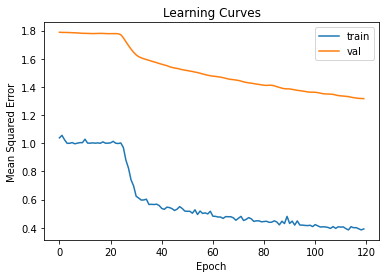

In [54]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

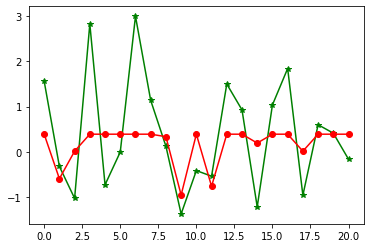

In [55]:
# Predict test set
y_pred = model.predict(x_test)

# Inverser transforms on target variable
y_test = pt2.inverse_transform(y_test)
y_pred = pt2.inverse_transform(y_pred)

plt.plot(y_test, 'g*-', y_pred, 'ro-')
plt.show()

In [56]:
# evaluate predictions
score = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % score)

MAE: 0.876
